Exercises

Our Zillow scenario continues:

As a Codeup data science graduate, you want to show off your skills to the Zillow data science team in hopes of getting an interview for a position you saw pop up on LinkedIn. You thought it might look impressive to build an end-to-end project in which you use some of their Kaggle data to predict property values using some of their available features; who knows, you might even do some feature engineering to blow them away. Your goal is to predict the values of single unit properties using the observations from 2017.

In these exercises, you will run through the stages of exploration as you continue to work toward the above goal.

- As with encoded vs. unencoded data, we recommend exploring un-scaled data in your EDA process.

- Make sure to perform a train, validate, test split before and use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.

- Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

- Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

- Save the functions you have written to create visualizations in your explore.py file. Rewrite your notebook code so that you are using the functions imported from this file.

- Use the functions you created above to explore your Zillow train dataset in your explore.ipynb notebook.

- Come up with some initial hypotheses based on your goal of predicting property value.

- Visualize all combinations of variables in some way.

- Run the appropriate statistical tests where needed.

- What independent variables are correlated with the dependent variable, home value?

- Which independent variables are correlated with other independent variables (bedrooms, bathrooms, year built, square feet)?

- Make sure to document your takeaways from visualizations and statistical tests as well as the decisions you make throughout your process.

- Explore your dataset with any other visualizations you think will be helpful.

Bonus Exercise

In a seperate notebook called explore_mall, use the functions you have developed in this exercise with the mall_customers dataset in the Codeup database server. You will need to write a sql query to acquire your data. Make spending_score your target variable.

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import wrangle
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr, spearmanr

In [2]:
df = wrangle.wrangle_zillow()

In [3]:
df.head()

,bedrooms,bathrooms,sqft,tax_value,year,tax_amount,fips
4,4,2.0,3633.0,296425.0,2005,6941.39,6037
18,3,1.0,1244.0,169471.0,1950,2532.88,6037
19,3,2.0,1300.0,233266.0,1950,3110.99,6037
20,3,2.0,1222.0,290492.0,1951,3870.25,6037
23,3,2.5,1821.0,537949.0,2013,6173.72,6059


In [4]:
df.describe()

,bedrooms,bathrooms,sqft,tax_value,year,tax_amount,fips
count,1.665488e+06,1.665488e+06,1.665488e+06,1.665488e+06,1.665488e+06,1.665488e+06,1.665488e+06
mean,3.202682e+00,2.018917e+00,1.618805e+03,2.802478e+05,1.958524e+03,3.543433e+03,6.047874e+03
std,8.305850e-01,7.184164e-01,5.723218e+02,1.494784e+05,1.996527e+01,1.718057e+03,2.039691e+01
min,1.000000e+00,5.000000e-01,7.010000e+02,1.312000e+03,1.900000e+03,1.648000e+01,6.037000e+03
25%,3.000000e+00,2.000000e+00,1.210000e+03,1.589940e+05,1.949000e+03,2.191490e+03,6.037000e+03
50%,3.000000e+00,2.000000e+00,1.502000e+03,2.697620e+05,1.956000e+03,3.448020e+03,6.037000e+03
75%,4.000000e+00,2.500000e+00,1.909000e+03,3.939160e+05,1.970000e+03,4.838763e+03,6.059000e+03
max,7.000000e+00,5.500000e+00,9.880000e+03,5.999990e+05,2.016000e+03,7.999920e+03,6.111000e+03


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1665488 entries, 4 to 2152863
Data columns (total 7 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   bedrooms    1665488 non-null  int64  
 1   bathrooms   1665488 non-null  float64
 2   sqft        1665488 non-null  float64
 3   tax_value   1665488 non-null  float64
 4   year        1665488 non-null  int64  
 5   tax_amount  1665488 non-null  float64
 6   fips        1665488 non-null  int64  
dtypes: float64(4), int64(3)
memory usage: 101.7 MB


In [6]:
df.bedrooms.value_counts()

3    819305
4    458274
2    288849
5     75617
1     11026
6     10711
7      1706
Name: bedrooms, dtype: int64

In [7]:
df.bathrooms.value_counts()

2.00    840223
1.00    370020
3.00    282499
2.50    101205
1.50     30131
4.00     28287
3.50      7934
5.00      3967
4.50      1125
5.50        89
0.50         6
1.75         2
Name: bathrooms, dtype: int64

In [8]:
df.tax_amount.describe()

count    1.665488e+06
mean     3.543433e+03
std      1.718057e+03
min      1.648000e+01
25%      2.191490e+03
50%      3.448020e+03
75%      4.838763e+03
max      7.999920e+03
Name: tax_amount, dtype: float64

<AxesSubplot:>

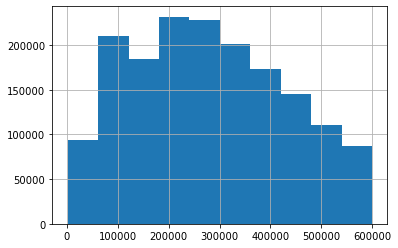

In [9]:
df.tax_value.hist()

<AxesSubplot:>

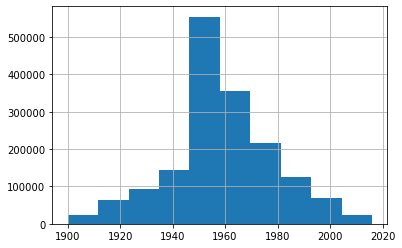

In [10]:
df.year.hist()

<AxesSubplot:>

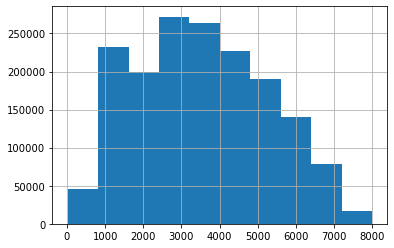

In [11]:
df.tax_amount.hist()

<AxesSubplot:>

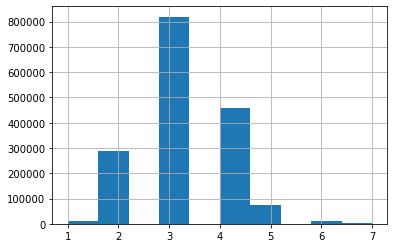

In [12]:
df.bedrooms.hist()

<AxesSubplot:>

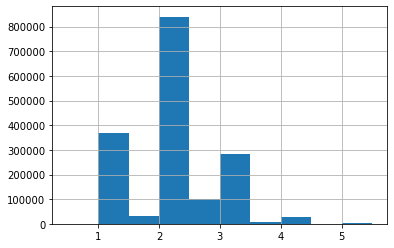

In [13]:
df.bathrooms.hist()

In [14]:
df.fips.value_counts()

6037    1144099
6059     393686
6111     127703
Name: fips, dtype: int64

In [16]:
train, validate, test = wrangle.split_data(df)

In [17]:
train.shape, validate.shape, test.shape

((999292, 7), (333098, 7), (333098, 7))

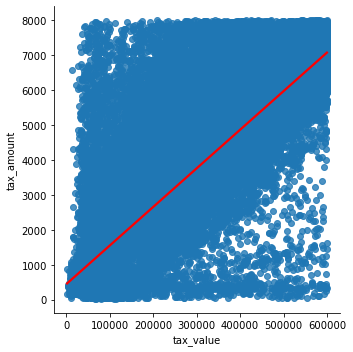

In [18]:
sns.lmplot(x='tax_value', y='tax_amount', data=train, line_kws={'color': 'red'})

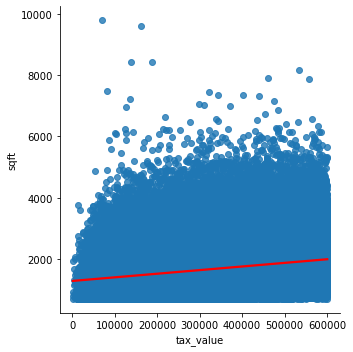

In [19]:
sns.lmplot(x='tax_value', y='sqft', data=train, line_kws={'color': 'red'})

<AxesSubplot:xlabel='bedrooms', ylabel='tax_value'>

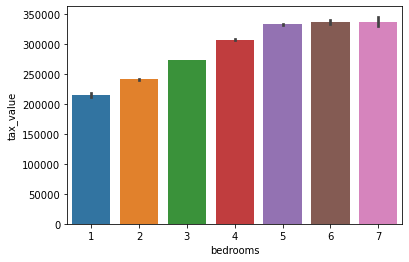

In [20]:
sns.barplot(x='bedrooms', y='tax_value', data=train)

<AxesSubplot:xlabel='bathrooms', ylabel='tax_value'>

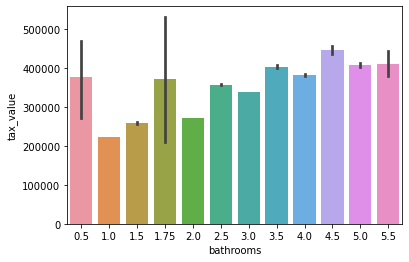

In [21]:
sns.barplot(x='bathrooms', y='tax_value', data=train)

<AxesSubplot:xlabel='year', ylabel='tax_value'>

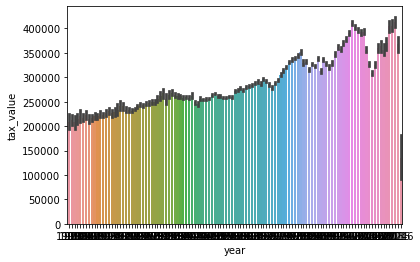

In [22]:
sns.barplot(x='year', y='tax_value', data=train)

In [32]:
zillow_corr = train.corr()
zillow_corr

,bedrooms,bathrooms,sqft,tax_value,year,tax_amount,fips
bedrooms,1.000000,0.592757,0.601829,0.170471,0.342043,0.174993,0.142705
bathrooms,0.592757,1.000000,0.758086,0.286281,0.504358,0.289559,0.121864
sqft,0.601829,0.758086,1.000000,0.308269,0.413196,0.310376,0.114233
tax_value,0.170471,0.286281,0.308269,1.000000,0.216321,0.960914,0.115472
year,0.342043,0.504358,0.413196,0.216321,1.000000,0.227408,0.277652
tax_amount,0.174993,0.289559,0.310376,0.960914,0.227408,1.000000,0.028655
fips,0.142705,0.121864,0.114233,0.115472,0.277652,0.028655,1.000000


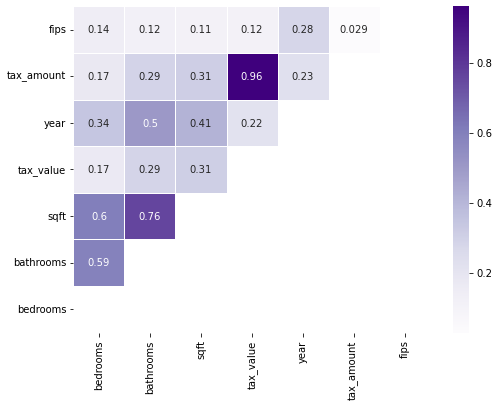

In [33]:
plt.figure(figsize=(8,6))
sns.heatmap(zillow_corr, cmap='Purples', annot=True, linewidth=0.5, mask= np.triu(zillow_corr))
plt.ylim(0, 7)

plt.show()

In [34]:
zillow_spearman = train.corr(method='spearman')
zillow_spearman

,bedrooms,bathrooms,sqft,tax_value,year,tax_amount,fips
bedrooms,1.000000,0.587133,0.615949,0.170822,0.400718,0.173290,0.171674
bathrooms,0.587133,1.000000,0.768842,0.288388,0.556448,0.286763,0.183483
sqft,0.615949,0.768842,1.000000,0.301771,0.465585,0.297987,0.168678
tax_value,0.170822,0.288388,0.301771,1.000000,0.207907,0.965603,0.142970
year,0.400718,0.556448,0.465585,0.207907,1.000000,0.203987,0.387339
tax_amount,0.173290,0.286763,0.297987,0.965603,0.203987,1.000000,0.049817
fips,0.171674,0.183483,0.168678,0.142970,0.387339,0.049817,1.000000


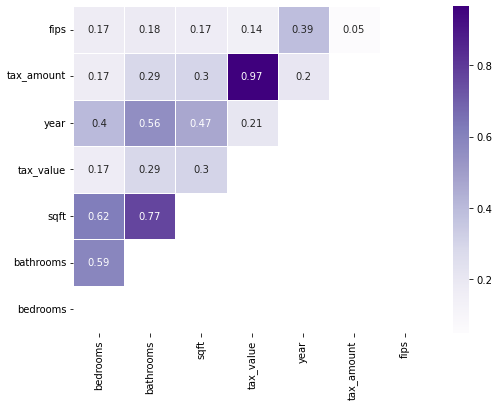

In [35]:
plt.figure(figsize=(8,6))
sns.heatmap(zillow_spearman, cmap='Purples', annot=True, linewidth=0.5, mask= np.triu(zillow_corr))
plt.ylim(0, 7)

plt.show()